In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
vote_cols = df.columns[-6:]

In [3]:
vote_cols

Index(['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote',
       'other_vote'],
      dtype='object')

In [4]:
df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

In [5]:
train = df.groupby('eeg_id')[['spectrogram_id', 'spectrogram_label_offset_seconds']].agg({'spectrogram_id' : 'first', 'spectrogram_label_offset_seconds' : 'min'})

In [6]:
train

,spectrogram_id,spectrogram_label_offset_seconds
eeg_id,,
568657,789577333,0.0
582999,1552638400,0.0
642382,14960202,1008.0
751790,618728447,908.0
778705,52296320,0.0
...,...,...
4293354003,1188113564,0.0
4293843368,1549502620,0.0
4294455489,2105480289,0.0


In [7]:
train.columns = ['spec_id', 'min']

In [8]:
train.head(10)

,spec_id,min
eeg_id,,
568657,789577333,0.0
582999,1552638400,0.0
642382,14960202,1008.0
751790,618728447,908.0
778705,52296320,0.0
1629671,2036345030,0.0
1895581,128369999,1138.0
2061593,320962633,1450.0
2078097,2074135650,3342.0


In [9]:
tmp = df.groupby('eeg_id')[['spectrogram_label_offset_seconds']].agg({'spectrogram_label_offset_seconds' : 'max'})

In [10]:
train['max'] = tmp

In [11]:
train.head(10)

,spec_id,min,max
eeg_id,,,
568657,789577333,0.0,16.0
582999,1552638400,0.0,38.0
642382,14960202,1008.0,1032.0
751790,618728447,908.0,908.0
778705,52296320,0.0,0.0
1629671,2036345030,0.0,160.0
1895581,128369999,1138.0,1138.0
2061593,320962633,1450.0,1450.0
2078097,2074135650,3342.0,3342.0


In [12]:
tmp = df.groupby('eeg_id')[['patient_id']].agg('first')

In [13]:
train['patient_id'] = tmp 

In [14]:
tmp = df.groupby('eeg_id')[vote_cols].agg('sum')

In [15]:
tmp['total_votes'] = tmp.sum(axis=1)

In [16]:
for t in vote_cols:
    tmp[t] = tmp[t] / tmp['total_votes']

In [17]:
train[vote_cols] = tmp[vote_cols]

In [18]:
train.head(10)

,spec_id,min,max,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
eeg_id,,,,,,,,,,
568657,789577333,0.0,16.0,20654,0.000000,0.000000,0.25,0.000000,0.166667,0.583333
582999,1552638400,0.0,38.0,20230,0.000000,0.857143,0.00,0.071429,0.000000,0.071429
642382,14960202,1008.0,1032.0,5955,0.000000,0.000000,0.00,0.000000,0.000000,1.000000
751790,618728447,908.0,908.0,38549,0.000000,0.000000,1.00,0.000000,0.000000,0.000000
778705,52296320,0.0,0.0,40955,0.000000,0.000000,0.00,0.000000,0.000000,1.000000
1629671,2036345030,0.0,160.0,37481,1.000000,0.000000,0.00,0.000000,0.000000,0.000000
1895581,128369999,1138.0,1138.0,47999,0.076923,0.000000,0.00,0.000000,0.076923,0.846154
2061593,320962633,1450.0,1450.0,23828,0.000000,0.000000,0.00,0.000000,0.000000,1.000000
2078097,2074135650,3342.0,3342.0,61174,0.000000,0.000000,0.00,0.000000,0.000000,1.000000


In [19]:
tmp = df.groupby('eeg_id')[['expert_consensus']].agg('first')
train['target'] = tmp

In [20]:
train = train.reset_index()


In [21]:
train.head(10)

,eeg_id,spec_id,min,max,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,target
0,568657,789577333,0.0,16.0,20654,0.000000,0.000000,0.25,0.000000,0.166667,0.583333,Other
1,582999,1552638400,0.0,38.0,20230,0.000000,0.857143,0.00,0.071429,0.000000,0.071429,LPD
2,642382,14960202,1008.0,1032.0,5955,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,Other
3,751790,618728447,908.0,908.0,38549,0.000000,0.000000,1.00,0.000000,0.000000,0.000000,GPD
4,778705,52296320,0.0,0.0,40955,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,Other
5,1629671,2036345030,0.0,160.0,37481,1.000000,0.000000,0.00,0.000000,0.000000,0.000000,Seizure
6,1895581,128369999,1138.0,1138.0,47999,0.076923,0.000000,0.00,0.000000,0.076923,0.846154,Other
7,2061593,320962633,1450.0,1450.0,23828,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,Other
8,2078097,2074135650,3342.0,3342.0,61174,0.000000,0.000000,0.00,0.000000,0.000000,1.000000,Other
9,2366870,1232582129,0.0,30.0,23633,0.000000,0.333333,0.00,0.000000,0.000000,0.666667,Other


In [22]:
train.shape

(17089, 12)

In [23]:
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=10)
for (t,v) in gkf.split(train, train.target, train['patient_id']):
    train_idx = t
    val_idx = v
    break

In [24]:
df_train = train.loc[train_idx]
df_val = train.loc[val_idx]

In [25]:
print(df_train.shape, df_val.shape)

(15380, 12) (1709, 12)


## Let's look at the distribution of the various kinds of votes in this train/val split 

In [26]:
train['target'].value_counts(normalize=True)

target
Other      0.421090
Seizure    0.162970
LPD        0.150799
GRDA       0.106969
GPD        0.104570
LRDA       0.053602
Name: proportion, dtype: float64

In [27]:
df_train['target'].value_counts(normalize=True)

target
Other      0.424642
Seizure    0.162939
LPD        0.146229
GRDA       0.109623
GPD        0.106827
LRDA       0.049740
Name: proportion, dtype: float64

In [28]:
df_val['target'].value_counts(normalize=True)

target
Other      0.389116
LPD        0.191925
Seizure    0.163253
LRDA       0.088356
GPD        0.084260
GRDA       0.083090
Name: proportion, dtype: float64

## Let's try this with StratifiedGroupKFold

In [29]:
from sklearn.model_selection import StratifiedGroupKFold

In [30]:
sgkf = StratifiedGroupKFold(n_splits=10)
for (t,v) in sgkf.split(train, train.target, train['patient_id']):
    train_idx_strat = t
    val_idx_strat = v
    break

In [31]:
df_train_strat = train.loc[train_idx_strat]
df_val_strat = train.loc[val_idx_strat]

In [32]:
print(df_train.shape, df_val.shape)
print (df_train_strat.shape, df_val_strat.shape)

(15380, 12) (1709, 12)
(15380, 12) (1709, 12)


In [33]:
print(train['target'].value_counts(normalize=True), '\n')
print(df_train['target'].value_counts(normalize=True), '\n')
print(df_val['target'].value_counts(normalize=True), '\n')
print(df_train_strat['target'].value_counts(normalize=True), '\n')
print(df_val_strat['target'].value_counts(normalize=True))

target
Other      0.421090
Seizure    0.162970
LPD        0.150799
GRDA       0.106969
GPD        0.104570
LRDA       0.053602
Name: proportion, dtype: float64 

target
Other      0.424642
Seizure    0.162939
LPD        0.146229
GRDA       0.109623
GPD        0.106827
LRDA       0.049740
Name: proportion, dtype: float64 

target
Other      0.389116
LPD        0.191925
Seizure    0.163253
LRDA       0.088356
GPD        0.084260
GRDA       0.083090
Name: proportion, dtype: float64 

target
Other      0.421131
Seizure    0.162939
LPD        0.150780
GRDA       0.106957
GPD        0.104551
LRDA       0.053641
Name: proportion, dtype: float64 

target
Other      0.420714
Seizure    0.163253
LPD        0.150965
GRDA       0.107080
GPD        0.104740
LRDA       0.053248
Name: proportion, dtype: float64


## It appears that StratifiedGroupKFold works better for our purposes!

## Let's try all of this will all the data (including overlaps)!

In [34]:
df['offset_bins'] = pd.cut(df['eeg_label_offset_seconds'], bins=[i*10 - 1 for i in range(339)])

In [35]:
df['offset_bins'] = df['offset_bins'].astype('str')

In [36]:
df['offset_bins'] = df['offset_bins'].apply(lambda x : (int(x.split(',')[1][1:-1]) + 1) // 10 - 1 )

In [37]:
df.head(20)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,offset_bins
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0,1
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,2
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0,2
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0,3
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0,3
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0,4
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5,0


In [38]:
df.shape[0]

106800

In [39]:
df = df.loc[df['offset_bins'] % 2 == 0]

In [40]:
df.shape[0]

65745

In [41]:
df.head(20)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,offset_bins
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0,2
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0,2
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0,4
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5,0
10,2277392603,1,2.0,924234,1,2.0,134339127,30539,GPD,0,0,5,0,1,5,0
11,722738444,0,0.0,999431,0,0.0,557980729,56885,LRDA,0,1,0,14,0,1,0
12,722738444,1,2.0,999431,1,2.0,1949834128,56885,LRDA,0,1,0,14,0,1,0


In [42]:
tmp = df.groupby(['eeg_id', 'offset_bins']).agg('first').reset_index()

In [43]:
df = tmp

In [44]:
df.head(20)

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0,12,0,1,0,1
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0,12,0,1,0,1
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0,0,0,0,0,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1
5,751790,0,0,0.0,618728447,4,908.0,2898467035,38549,GPD,0,0,1,0,0,0
6,778705,0,0,0.0,52296320,0,0.0,3255875127,40955,Other,0,0,0,0,0,2
7,1629671,0,0,0.0,2036345030,0,0.0,3715807879,37481,Seizure,3,0,0,0,0,0
8,1629671,4,4,46.0,2036345030,4,46.0,80277438,37481,Seizure,3,0,0,0,0,0
9,1629671,6,6,68.0,2036345030,6,68.0,3011516754,37481,Seizure,3,0,0,0,0,0


In [45]:
vote_cols = df.columns[-6:]

In [46]:
df['total_votes'] = df[vote_cols].sum(axis=1)

In [47]:
df.head(5)

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0,0,3,0,2,7,12
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0,12,0,1,0,1,14
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0,12,0,1,0,1,14
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0,0,0,0,0,1,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0,0,0,0,0,1,1


In [48]:
for c in vote_cols:
    df[c] = df[c] / df['total_votes']

In [49]:
df.head(10)

,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0.0,0.000000,0.25,0.000000,0.166667,0.583333,12
1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1
4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1
5,751790,0,0,0.0,618728447,4,908.0,2898467035,38549,GPD,0.0,0.000000,1.00,0.000000,0.000000,0.000000,1
6,778705,0,0,0.0,52296320,0,0.0,3255875127,40955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,2
7,1629671,0,0,0.0,2036345030,0,0.0,3715807879,37481,Seizure,1.0,0.000000,0.00,0.000000,0.000000,0.000000,3
8,1629671,4,4,46.0,2036345030,4,46.0,80277438,37481,Seizure,1.0,0.000000,0.00,0.000000,0.000000,0.000000,3
9,1629671,6,6,68.0,2036345030,6,68.0,3011516754,37481,Seizure,1.0,0.000000,0.00,0.000000,0.000000,0.000000,3


In [50]:
df.columns

Index(['eeg_id', 'offset_bins', 'eeg_sub_id', 'eeg_label_offset_seconds',
       'spectrogram_id', 'spectrogram_sub_id',
       'spectrogram_label_offset_seconds', 'label_id', 'patient_id',
       'expert_consensus', 'seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote',
       'grda_vote', 'other_vote', 'total_votes'],
      dtype='object')

In [51]:
df.shape[0] * 0.8

26973.600000000002

In [52]:
sgkf = StratifiedGroupKFold(n_splits=10)
for (t,v) in sgkf.split(X = df, y=df['expert_consensus'], groups=df['patient_id']):
    train_idx_full = t
    test_idx_full = v
    break

In [53]:
df_train = df.loc[train_idx_full]
df_test = df.loc[test_idx_full]

In [54]:
print(df_train.shape, df_test.shape, df.shape)

(30348, 17) (3369, 17) (33717, 17)


In [55]:
df_train.shape[0] / df.shape[0] * 100

90.0080078298781

In [56]:
print(df['expert_consensus'].value_counts(normalize=True), '\n')
print(df_train['expert_consensus'].value_counts(normalize=True), '\n')
print(df_test['expert_consensus'].value_counts(normalize=True))

expert_consensus
Other      0.284011
Seizure    0.218851
LPD        0.150814
GRDA       0.144882
GPD        0.123558
LRDA       0.077884
Name: proportion, dtype: float64 

expert_consensus
Other      0.283973
Seizure    0.218828
LPD        0.150817
GRDA       0.144853
GPD        0.123633
LRDA       0.077896
Name: proportion, dtype: float64 

expert_consensus
Other      0.284357
Seizure    0.219056
LPD        0.150787
GRDA       0.145147
GPD        0.122885
LRDA       0.077768
Name: proportion, dtype: float64


In [57]:
tmp1 = pd.DataFrame(df['expert_consensus'].value_counts(normalize=True))
tmp1.reset_index(inplace=True)

tmp2 = pd.DataFrame(df_train['expert_consensus'].value_counts(normalize=True))
tmp2.reset_index(inplace=True)

tmp3 = pd.DataFrame(df_test['expert_consensus'].value_counts(normalize=True))
tmp3.reset_index(inplace=True)

tmp1 = tmp1.sort_values(by='expert_consensus')
tmp2 = tmp2.sort_values(by='expert_consensus')
tmp3 = tmp3.sort_values(by='expert_consensus')

X = list(tmp1['expert_consensus'].values)

Y1 = tmp1['proportion']
Y2 = tmp2['proportion']
Y3 = tmp3['proportion']


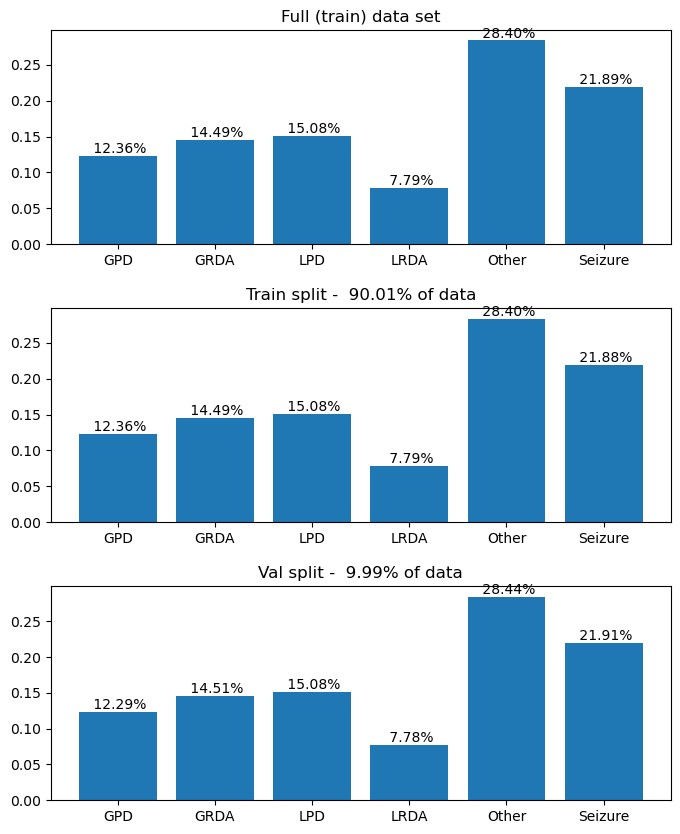

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, figsize=(8,10))
fig.subplots_adjust(hspace=0.3)

axs[0].bar(X, Y1)
axs[0].set_title('Full (train) data set')

axs[1].bar(X, Y2)
axs[1].set_title(f'Train split - {(df_train.shape[0] / df.shape[0]) * 100 : .2f}% of data')

axs[2].bar(X, Y3)
axs[2].set_title(f'Val split - {(df_test.shape[0] / df.shape[0]) * 100 : .2f}% of data')

for i, p in enumerate(Y1):
    axs[0].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

for i, p in enumerate(Y2):
    axs[1].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

for i, p in enumerate(Y3):
    axs[2].text(i, p, f'{p*100 : .2f}%', ha='center', va='bottom')

plt.show()

### I think we should stick to using all the data for now - then later we can fiddle with this further